# Instalação de Bibliotecas

In [1]:
!pip install pyngrok
!pip install streamlit
!pip install ipeadatapy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 37.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 33.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 3.8 MB/s eta 0:00:00


# Bibliotecas

In [2]:
import ipeadatapy
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
from prophet import Prophet
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error
from getpass import getpass
from pyngrok import ngrok
from google.colab import drive

# Arquivos do projeto

In [3]:
# Área de trabalho do projeto
drive.mount('/content/drive')
workspace_path = '/content/drive/MyDrive/Workspace'

Mounted at /content/drive


In [4]:
# Caminho para os arquivos dos dados
data_path = f'{workspace_path}/fiap/pos-tech/data-analytics/fase-4'
data_path += '/tech-challenge/dados'

# Carga dos Dados Brutos

In [5]:
# Lista das séries de dados disponíveis na API do IPEA
series = ipeadatapy.list_series()
series.head()

,CODE,NAME
0,ABATE_ABPEAV,Abate - aves - peso das carcaças
1,ABATE_ABQUBV,Abate - bovinos - quantidade
2,ABATE12_ABPEVA12,Abate - vacas - peso das carcaças
3,ABATE12_ABQUBO12,Abate - bois - quantidade
4,ABATE12_ABQUBV12,Abate - bovinos - quantidade


In [6]:
# Filtro das séries que relacionadas ao Petróleo Brent
series_brent = series[series['CODE'].str.contains('Brent', case=False,
                                                  na=False)]
series_brent.head()

,CODE,NAME
1063,EIA366_PBRENT366,Preço - petróleo bruto - Brent (FOB)


In [7]:
# Obtendo os dados da série
df = ipeadatapy.timeseries('EIA366_PBRENT366')

In [8]:
# Gravando os dados em um CSV como cópia de segurança
df.to_csv(f'{data_path}/petroleo_brent_ipea_eia366_pbrent366_raw.csv')

# EDA

## Limpeza dos dados

In [9]:
# Análise inicial dos dados obtidos
display(df.info())
display(df)

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 13577 entries, 1986-01-04 to 2024-11-25
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   CODE         13577 non-null  object 
 1   RAW DATE     13577 non-null  object 
 2   DAY          13577 non-null  int32  
 3   MONTH        13577 non-null  int32  
 4   YEAR         13577 non-null  int32  
 5   VALUE (US$)  11307 non-null  float64
dtypes: float64(1), int32(3), object(2)
memory usage: 583.4+ KB


None

,CODE,RAW DATE,DAY,MONTH,YEAR,VALUE (US$)
DATE,,,,,,
1986-01-04,EIA366_PBRENT366,1986-01-04T00:00:00-02:00,4,1,1986,NaN
1986-01-05,EIA366_PBRENT366,1986-01-05T00:00:00-02:00,5,1,1986,NaN
1986-01-06,EIA366_PBRENT366,1986-01-06T00:00:00-02:00,6,1,1986,NaN
1986-01-07,EIA366_PBRENT366,1986-01-07T00:00:00-02:00,7,1,1986,NaN
1986-01-08,EIA366_PBRENT366,1986-01-08T00:00:00-02:00,8,1,1986,NaN
...,...,...,...,...,...,...
2024-11-19,EIA366_PBRENT366,2024-11-19T00:00:00-03:00,19,11,2024,74.32
2024-11-20,EIA366_PBRENT366,2024-11-20T00:00:00-03:00,20,11,2024,74.33
2024-11-21,EIA366_PBRENT366,2024-11-21T00:00:00-03:00,21,11,2024,75.09


In [10]:
# Certificando que o índice está no formato de data
df.index = pd.to_datetime(df.index)

In [11]:
# Identificando conjunto de dados com a coluna "VALUE (US$)" com valores válidos
df = df.dropna(subset=['VALUE (US$)'])
df = df.sort_index()
display(df.head())
display(df.tail())

,CODE,RAW DATE,DAY,MONTH,YEAR,VALUE (US$)
DATE,,,,,,
1987-05-20,EIA366_PBRENT366,1987-05-20T00:00:00-03:00,20,5,1987,18.63
1987-05-21,EIA366_PBRENT366,1987-05-21T00:00:00-03:00,21,5,1987,18.45
1987-05-22,EIA366_PBRENT366,1987-05-22T00:00:00-03:00,22,5,1987,18.55
1987-05-25,EIA366_PBRENT366,1987-05-25T00:00:00-03:00,25,5,1987,18.60
1987-05-26,EIA366_PBRENT366,1987-05-26T00:00:00-03:00,26,5,1987,18.63


,CODE,RAW DATE,DAY,MONTH,YEAR,VALUE (US$)
DATE,,,,,,
2024-11-19,EIA366_PBRENT366,2024-11-19T00:00:00-03:00,19,11,2024,74.32
2024-11-20,EIA366_PBRENT366,2024-11-20T00:00:00-03:00,20,11,2024,74.33
2024-11-21,EIA366_PBRENT366,2024-11-21T00:00:00-03:00,21,11,2024,75.09
2024-11-22,EIA366_PBRENT366,2024-11-22T00:00:00-03:00,22,11,2024,76.10
2024-11-25,EIA366_PBRENT366,2024-11-25T00:00:00-03:00,25,11,2024,74.27


In [12]:
# Dataframe final, apenas com as colunas de interesse
df = df[['VALUE (US$)']]
df.rename(columns={'VALUE (US$)': 'value'}, inplace=True)
df.index.name = 'date'
display(df.head())

<ipython-input-12-357467d743f7>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns={'VALUE (US$)': 'value'}, inplace=True)


,value
date,
1987-05-20,18.63
1987-05-21,18.45
1987-05-22,18.55
1987-05-25,18.60
1987-05-26,18.63


In [13]:
# Gravando os dados em um CSV como cópia de segurança
df.to_csv(f'{data_path}/petroleo_brent.csv')

## Análises

### Petróleo Brent - Preço Médio Mensal
O gráfico abaixo mostra a evolução do preço médio mensal do petróleo Brent ao longo do tempo, que nos permite identificar períodos significativos de alta e baixa nos preços.

In [14]:
# Consolidação mensal para análise de tendências
df_mensal = df.resample('ME').mean()

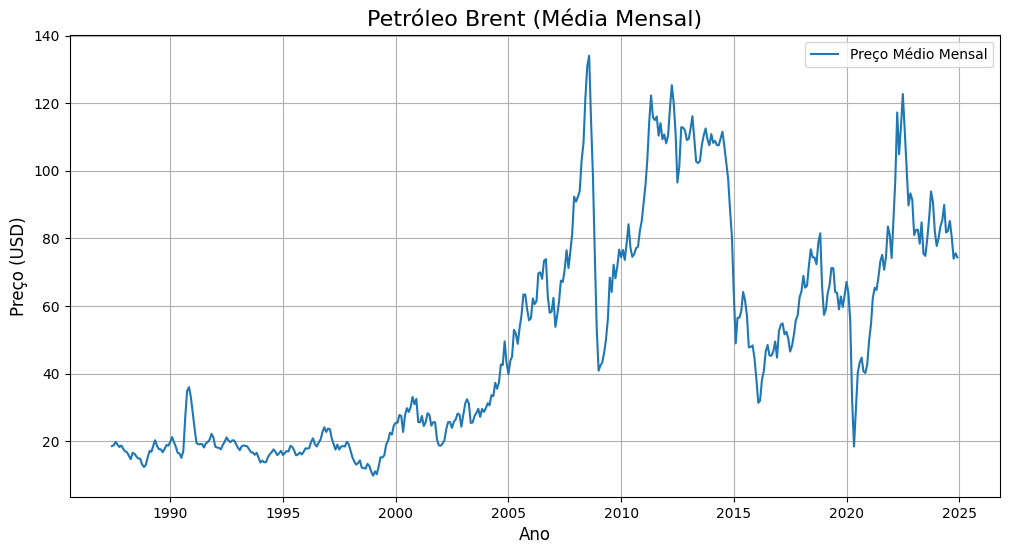

In [15]:
# Gráficos das médias de preço mensais
plt.figure(figsize=(12, 6))
plt.plot(df_mensal.index, df_mensal['value'], label='Preço Médio Mensal')
plt.title('Petróleo Brent (Média Mensal)', fontsize=16)
plt.xlabel('Ano', fontsize=12)
plt.ylabel('Preço (USD)', fontsize=12)
plt.grid(True)
plt.legend()
plt.show()

In [16]:
# Identificando as maiores variações mensais
mensais_min_max = {
    "Maior Preço": df_mensal['value'].max(),
    "Menor Preço": df_mensal['value'].min(),
    "Data do Maior Preço": df_mensal['value'].idxmax(),
    "Data do Menor Preço": df_mensal['value'].idxmin()
}

mensais_min_max

{'Maior Preço': 134.03096774193548,
 'Menor Preço': 9.824285714285715,
 'Data do Maior Preço': Timestamp('2008-07-31 00:00:00'),
 'Data do Menor Preço': Timestamp('1998-12-31 00:00:00')}

In [17]:
# Consolidação anual para análise de tendências
df_anual = df_mensal['value'].resample('YE').mean().pct_change() * 100

In [18]:
# Identificando as maiores variações anuais
df_maiores_var_anuais = df_anual[abs(df_anual) > 30]
df_maiores_var_anuais

,value
date,
1998-12-31,-33.154603
1999-12-31,39.661406
2000-12-31,59.801679
2004-12-31,31.958241
2005-12-31,42.423627
2008-12-31,34.688826
2009-12-31,-37.048955
2011-12-31,40.112583
2015-12-31,-47.093007


### Insights Relevantes sobre os Preços do Petróleo Brent

#### 1. Maior e Menor Preço do Petróleo:
- O preço mais alto foi de 134,03 USD em julho de 2008, coincidindo com o pico da demanda global antes da crise financeira de 2008.
- O preço mais baixo foi de 9,82 USD em dezembro de 1998, refletindo um excesso de oferta e uma crise de baixa demanda no final dos anos 90.

#### 2. Anos de Maior Volatilidade:
- 1998 (-33,2%): Queda acentuada devido à crise financeira asiática, que reduziu a demanda global por petróleo.
- 2000 (+59,8%): Recuperação rápida impulsionada pela revitalização econômica global e cortes na produção pela OPEP.
- 2008 (-37,0%) e 2009 (+34,7%): A crise financeira global levou a uma queda drástica, seguida por recuperação devido a estímulos econômicos.
- 2015 (-47,1%): Queda devido ao aumento da produção e desaceleração econômica global.
- 2020 (-35,0%): Impacto da pandemia de COVID-19, com queda na demanda global de energia.

#### 3. Impacto de Decisões Geopolíticas e da OPEP:
- Os cortes na produção pela OPEP, como em 2000 e 2022 (+42,6%), influenciaram diretamente a recuperação dos preços.
- Decisões de aumento de produção em períodos de alta demanda, como 2004 (+31,9%), elevaram os preços.

#### 4. Crises Econômicas e a Pandemia da COVID-19:
- A pandemia de 2020 resultou em uma queda abrupta nos preços devido às restrições globais e a queda significativa do transporte aéreo e terrestre.
- Durante crises econômicas, como a crise de 2008, os preços do petróleo refletem as condições econômicas globais, com quedas acentuadas seguidas de recuperações lentas.

#### Referências
- Dados disponíveis nos sites:
 - [Investing.com](https://br.investing.com/commodities/brent-oil-news)
 - [FXEmpire](https://www.fxempire.com/commodities/brent-crude-oil/news)

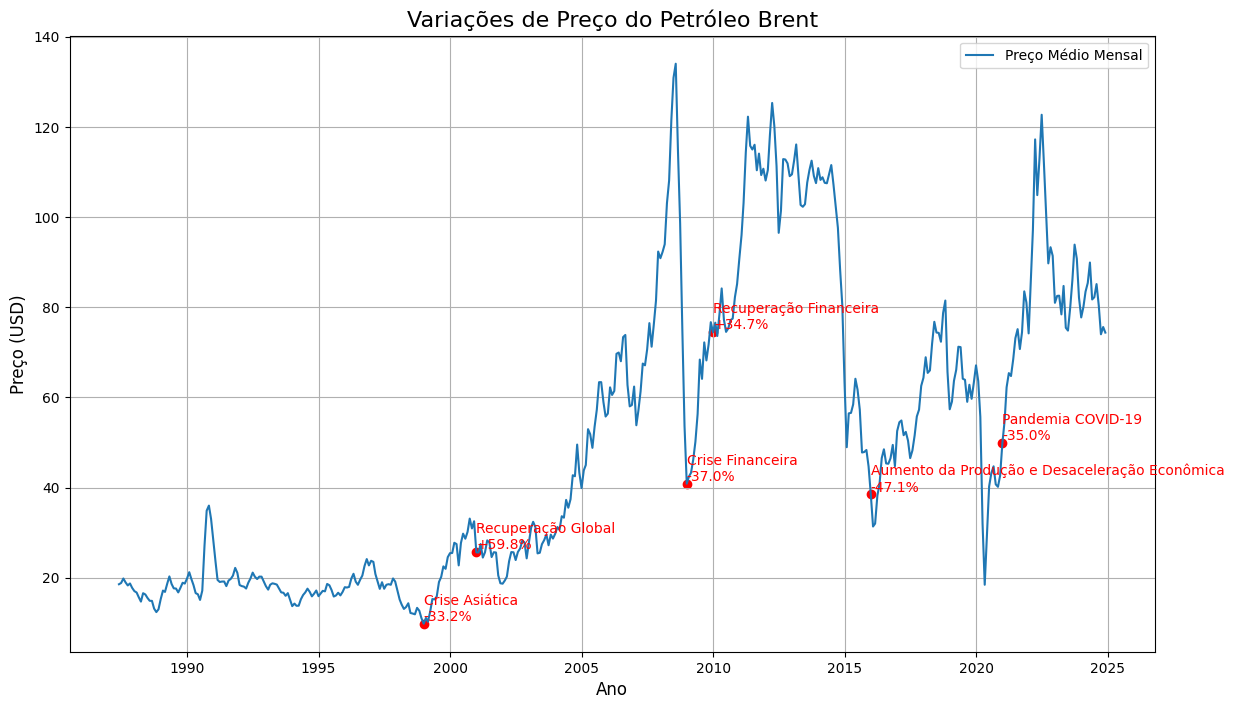

In [19]:
# Gráfico realçando as principais variações

# Grafico
plt.figure(figsize=(14, 8))
plt.plot(df_mensal.index, df_mensal['value'], label='Preço Médio Mensal')
plt.title('Variações de Preço do Petróleo Brent', fontsize=16)
plt.xlabel('Ano', fontsize=12)
plt.ylabel('Preço (USD)', fontsize=12)
plt.grid(True)
plt.legend()

# Principais variações
eventos = {
    '1998-12-31': 'Crise Asiática\n-33.2%',
    '2000-12-31': 'Recuperação Global\n+59.8%',
    '2008-12-31': 'Crise Financeira\n-37.0%',
    '2009-12-31': 'Recuperação Financeira\n+34.7%',
    '2015-12-31': 'Aumento da Produção e Desaceleração Econômica\n-47.1%',
    '2020-12-31': 'Pandemia COVID-19\n-35.0%'
}
for date, label in eventos.items():
    date = pd.Timestamp(date)
    price = df_mensal.loc[date, 'value']
    plt.scatter(date, price, color='red')  # Mark the event
    plt.text(date, price, label, fontsize=10, color='red', ha='left', va='bottom')

plt.show()

## Gráfico interativo

In [20]:
# Criando um DataFrame com os eventos
eventos_df = pd.DataFrame({
    'date': pd.to_datetime(list(eventos.keys())),
    'event': list(eventos.values())
})
eventos_df = eventos_df.merge(df_mensal, on='date', how='left')

# Dataframe mensal com a coluna de data
df_mensal.reset_index(inplace=True)

# Gráfico interativo
fig = px.line(df_mensal, x='date', y='value', title='Variações de Preço do Petróleo Brent',
              labels={'value': 'Preço Médio (USD)', 'date': 'Mês'})

# Adicionando marcadores para os eventos
fig.add_scatter(x=eventos_df['date'], y=eventos_df['value'], mode='markers+text',
                text=eventos_df['event'], textposition='top center',
                hovertext=eventos_df['event'], marker=dict(color='red', size=8),
                name='Evento')

# Configuração do layout
fig.update_layout(
    xaxis_title='Ano',
    yaxis_title='Preço (USD)',
    legend_title='Legenda',
    template='plotly_white',
    hovermode='x unified'
)

fig.show()

# Modelo

## Prophet

In [21]:
# Períodos de previsão
periodos = 14

In [22]:
# Preparando os dados para o Prophet
df = df.reset_index()
df_modelo = df[:-periodos]
df_modelo.columns = ['ds', 'y']

In [23]:
# Inicializando o modelo
modelo = Prophet()
modelo.fit(df_modelo[['ds', 'y']])

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpx7fu6sii/m49bqk5q.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpx7fu6sii/hpkhoh5g.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=14168', 'data', 'file=/tmp/tmpx7fu6sii/m49bqk5q.json', 'init=/tmp/tmpx7fu6sii/hpkhoh5g.json', 'output', 'file=/tmp/tmpx7fu6sii/prophet_modeljb_bv16m/prophet_model-20241201170045.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
17:00:45 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
17:00:53 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [24]:
# Previsão
futuro = modelo.make_future_dataframe(periods=periodos)
previsao = modelo.predict(futuro)

## Validação

In [25]:
# Criação do dataframe para validação
validacao = df.merge(previsao[['ds', 'yhat']], left_on='date', right_on='ds')

# Arredondamento do fechamento previsto
validacao['value_forecast'] = validacao['yhat'].round(2)

# Remoção das colunas duplicadas e já tratadas
validacao.drop(['ds', 'yhat'], axis=1, inplace=True)

In [26]:
# Filtra o DataFrame para exibir apenas as linhas da previsão
dados_previsao = validacao.tail(periodos).copy()
dados_previsao['Data'] = dados_previsao['date'].dt.strftime('%Y-%m-%d')
dados_previsao['Preço (USD)'] = dados_previsao['value_forecast']
dados_previsao.drop(['date', 'value', 'value_forecast'], axis=1, inplace=True)
display(dados_previsao)

,Data,Preço (USD)
11289,2024-10-31,89.03
11290,2024-11-01,88.99
11291,2024-11-04,88.88
11292,2024-11-05,88.76
11293,2024-11-06,88.69
11294,2024-11-07,88.75
11295,2024-11-08,88.72
11296,2024-11-11,88.65
11297,2024-11-12,88.54
11298,2024-11-13,88.47


In [27]:
# Métricas
mae = mean_absolute_error(validacao['value'],
                          validacao['value_forecast'])
mape = mean_absolute_percentage_error(validacao['value'],
                                      validacao['value_forecast'])
acuracia = (1 - mape) * 100

print('Métricas:',
      '\n', 'MAE: ', round(mae, 2),
      '\n', 'MAPE: ', round(mape * 100, 2), '%',
      '\n', 'Precisão: ', round(acuracia, 2), '%')

Métricas: 
 MAE:  6.94 
 MAPE:  15.16 % 
 Precisão:  84.84 %


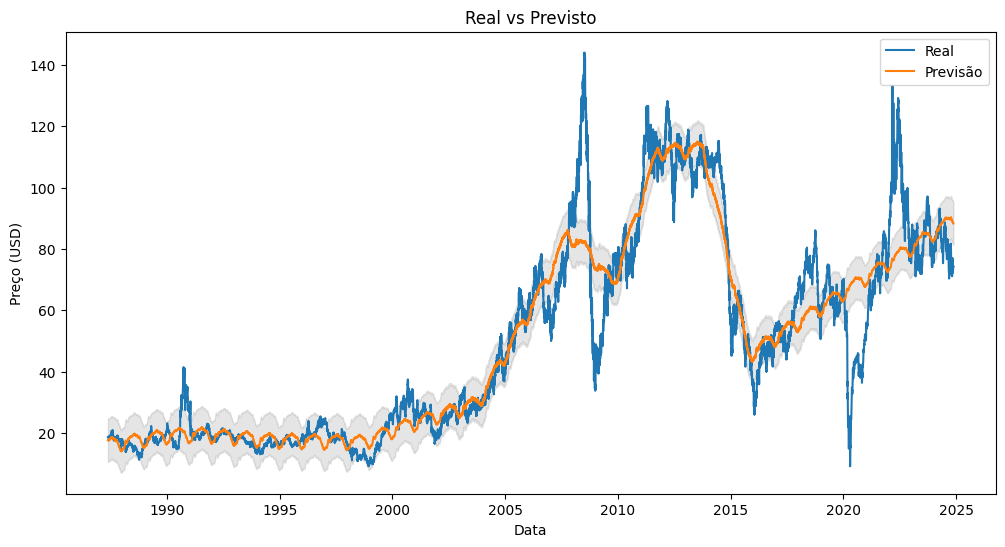

In [28]:
# Comparação entre real e previsto
plt.figure(figsize=(12, 6))
plt.plot(validacao['date'], validacao['value'], label='Real')
plt.plot(validacao['date'], validacao['value_forecast'], label='Previsão')
plt.fill_between(validacao['date'], validacao['value_forecast'] - mae,
                 validacao['value_forecast'] + mae, color='gray', alpha=0.2)
plt.title('Real vs Previsto')
plt.xlabel('Data')
plt.ylabel('Preço (USD)')
plt.legend()
plt.show()

# Streamlit

In [29]:
# Gravando os dados na raiz do projeto para carga pelo Streamlit
df.to_csv('petroleo_brent.csv', index=False)

In [30]:
streamlit_script = """
import streamlit as st
import pandas as pd
import plotly.express as px
from prophet import Prophet
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error
import matplotlib.pyplot as plt

st.title("Análise dos Preços do Petróleo Brent")

# Carregando os dados
df = pd.read_csv('petroleo_brent.csv')
df.index = pd.to_datetime(df['date'])
df.drop('date', axis=1, inplace=True)

# Médias mensais
df_mensal = df.resample('ME').mean().reset_index()

# Eventos
eventos = {
    '1998-12-31': 'Crise Asiática\\n-33.2%',
    '2000-12-31': 'Recuperação Global\\n+59.8%',
    '2008-12-31': 'Crise Financeira\\n-37.0%',
    '2009-12-31': 'Recuperação Financeira\\n+34.7%',
    '2015-12-31': 'Aumento da Produção e Desaceleração Econômica\\n-47.1%',
    '2020-12-31': 'Pandemia COVID-19\\n-35.0%'
}

eventos_df = pd.DataFrame({
    'date': pd.to_datetime(list(eventos.keys())),
    'event': list(eventos.values())
}).merge(df_mensal, on='date', how='left')

# Gráfico dinâmico
fig = px.line(df_mensal, x='date', y='value',
              title='Variações de Preço do Petróleo Brent',
              labels={'value': 'Preço Médio (USD)', 'date': 'Mês'})
fig.add_scatter(x=eventos_df['date'], y=eventos_df['value'],
                mode='markers+text', text=eventos_df['event'],
                textposition='top center', hovertext=eventos_df['event'],
                marker=dict(color='red', size=8), name='Evento')
fig.update_layout(
    xaxis_title='Ano',
    yaxis_title='Preço (USD)',
    legend_title='Legenda',
    template='plotly_white',
    hovermode='x unified'
)

st.plotly_chart(fig)

st.markdown('''
## Insights Relevantes sobre os Preços do Petróleo Brent

### 1. Maior e Menor Preço do Petróleo:
- O preço mais alto foi de 134,03 USD em julho de 2008, coincidindo com o pico da demanda global antes da crise financeira de 2008.
- O preço mais baixo foi de 9,82 USD em dezembro de 1998, refletindo um excesso de oferta e uma crise de baixa demanda no final dos anos 90.

### 2. Anos de Maior Volatilidade:
- 1998 (-33,2%): Queda acentuada devido à crise financeira asiática, que reduziu a demanda global por petróleo.
- 2000 (+59,8%): Recuperação rápida impulsionada pela revitalização econômica global e cortes na produção pela OPEP.
- 2008 (-37,0%) e 2009 (+34,7%): A crise financeira global levou a uma queda drástica, seguida por recuperação devido a estímulos econômicos.
- 2015 (-47,1%): Queda devido ao aumento da produção e desaceleração econômica global.
- 2020 (-35,0%): Impacto da pandemia de COVID-19, com queda na demanda global de energia.

### 3. Impacto de Decisões Geopolíticas e da OPEP:
- Os cortes na produção pela OPEP, como em 2000 e 2022 (+42,6%), influenciaram diretamente a recuperação dos preços.
- Decisões de aumento de produção em períodos de alta demanda, como 2004 (+31,9%), elevaram os preços.

### 4. Crises Econômicas e a Pandemia da COVID-19:
- A pandemia de 2020 resultou em uma queda abrupta nos preços devido às restrições globais e a queda significativa do transporte aéreo e terrestre.
- Durante crises econômicas, como a crise de 2008, os preços do petróleo refletem as condições econômicas globais, com quedas acentuadas seguidas de recuperações lentas.

### Referências
- Dados disponíveis nos sites:
  - [Investing.com](https://br.investing.com/commodities/brent-oil-news)
  - [FXEmpire](https://www.fxempire.com/commodities/brent-crude-oil/news)
''', unsafe_allow_html=True)

# Slider para os períodos
st.sidebar.title("Configurações de Previsão")
periodos = st.sidebar.slider("Períodos de previsão", min_value=7, max_value=14,
                             value=7, step=1)

# Preparando os dados para o Prophet
df = df.reset_index()
df_modelo = df[:-periodos]
df_modelo.columns = ['ds', 'y']

# Modelo
modelo = Prophet()
modelo.fit(df_modelo[['ds', 'y']])

# Previsão
futuro = modelo.make_future_dataframe(periods=periodos)
previsao = modelo.predict(futuro)

# Criação do dataframe para validação
validacao = df.merge(previsao[['ds', 'yhat']], left_on='date', right_on='ds')
validacao['value_forecast'] = validacao['yhat'].round(2)
validacao.drop(['ds', 'yhat'], axis=1, inplace=True)

# Métricas
mae = mean_absolute_error(validacao['value'],
                          validacao['value_forecast'])
mape = mean_absolute_percentage_error(validacao['value'],
                                      validacao['value_forecast'])
acuracia = (1 - mape) * 100

st.write("## Previsão")
st.write(f"### Períodos de previsão: {periodos}")

# Filtra o DataFrame para exibir apenas as linhas da previsão
dados_previsao = validacao.tail(periodos).copy()
dados_previsao['Data'] = dados_previsao['date'].dt.strftime('%Y-%m-%d')
dados_previsao['Preço (USD)'] = dados_previsao['value_forecast']
dados_previsao.drop(['date', 'value', 'value_forecast'], axis=1, inplace=True)

# Display the forecasted rows
st.write("### Previsões para os Próximos Períodos")
st.dataframe(dados_previsao.reset_index(drop=True))

st.write("### Métricas")
st.write(f"- **MAE**: {round(mae, 2)}")
st.write(f"- **MAPE**: {round(mape * 100, 2)}%")
st.write(f"- **Precisão**: {round(acuracia, 2)}%")

# Real vs Previsto
st.write("### Real vs Previsto")
plt.figure(figsize=(12, 6))
plt.plot(validacao['date'], validacao['value'], label='Real', color='blue')
plt.plot(validacao['date'], validacao['value_forecast'], label='Previsão',
         color='orange')
plt.fill_between(validacao['date'], validacao['value_forecast'] - mae,
                 validacao['value_forecast'] + mae, color='gray', alpha=0.2)
plt.title('Real vs Previsto')
plt.xlabel('Data')
plt.ylabel('Preço (USD)')
plt.legend()
st.pyplot(plt)
"""

In [31]:
# Gravando o script em um arquivo
with open('streamlit_app.py', 'w') as f:
    f.write(streamlit_script)

In [32]:
# Executando o app
!streamlit run streamlit_app.py &> /dev/null&

In [33]:
# ngrok
ngrok_token = getpass("ngrok token: ")
!ngrok config add-authtoken $ngrok_token

ngrok token: ··········
Authtoken saved to configuration file: /root/.config/ngrok/ngrok.yml


In [34]:
public_url = ngrok.connect(addr="8501", proto="http")
print("Streamlit app URL:", public_url)

Streamlit app URL: NgrokTunnel: "https://cbf0-35-199-20-56.ngrok-free.app" -> "http://localhost:8501"
